In [1]:
import numpy as np
# np.set_printoptions(threshold=np.inf, precision=3, suppress=True, linewidth=120)

In [ ]:
# data=np.load(r"F:\data\CarCrash\vgg16_features\negative\001393.npz",allow_pickle=True)
data=np.load(r"F:\data\CarCrash\vgg16_features\positive\000003.npz",allow_pickle=True)
# data.shape()
print("data", data['data'])
print('detection:',data['det'])
# print('label', data['labels'])

In [6]:
import os
def find_nonzero_det_file(folder_path):
    """遍历文件夹统计包含confidence=1的文件"""
    total_files = 0
    files_with_conf = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.npz'):
            total_files += 1
            file_path = os.path.join(folder_path, filename)
            try:
                data = np.load(file_path, allow_pickle=True)
                det = data['det']  # shape: (frames, boxes, 6)
                
                # 检查det数组中是否有confidence=1的值
                if np.any(det[:, :, 4] == 1.0):
                    files_with_conf.append(filename)
                    
            except Exception as e:
                print(f"处理文件 {filename} 时出错: {str(e)}")
                continue
    
    # 输出统计信息
    print(f"\n统计信息:")
    print(f"处理的文件总数: {total_files}")
    print(f"包含confidence=1的文件数: {len(files_with_conf)}")
    if files_with_conf:
        print("\n包含confidence=1的文件列表:")
        for filename in files_with_conf:
            print(f"- {filename}")
    
    return files_with_conf

# 使用函数查找文件
folder_path = r"F:\data\CarCrash\vgg16_features\positive"
results = find_nonzero_det_file(folder_path)


统计信息:
处理的文件总数: 1500
包含confidence=1的文件数: 0


In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
def visualize_detections(video_path, feature_file, frame_idx=0):
    """
    Visualize detection boxes and confidence scores for a specific frame
    
    Args:
        video_path: Path to the video file
        feature_file: Path to the .npz file containing detections and features
        frame_idx: Index of the frame to visualize
    """
    # Load the video and feature file
    cap = cv2.VideoCapture(video_path)
    feat_data = np.load(feature_file)
    detections = feat_data['det']  # Shape: (n_frames, n_boxes, 6) where 6 = (x1,y1,x2,y2,conf,cls)
    
    # Get the frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if not ret:
        print(f"Error reading frame {frame_idx}")
        return
    
    # Convert BGR to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Get detections for this frame
    frame_dets = detections[frame_idx]
    
    # Create figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(frame)
    
    # Draw each detection box
    for box in frame_dets:
        x1, y1, x2, y2, conf, cls = box
        
        # Create rectangle
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        
        # Add label with confidence
        label = f'Conf: {conf:.2f}'
        ax.text(x1, y1-5, label, color='red', fontsize=10, 
                bbox=dict(facecolor='white', alpha=0.7))
    
    ax.set_title(f'Frame {frame_idx} Detections')
    plt.axis('off')
    plt.show()
    
    cap.release()

NPZ 文件完整信息

文件路径: F:\data\CarCrash\vgg16_features\positive\000003.npz
所有键: ['data', 'det', 'labels', 'ID']

【data】
  类型: <class 'numpy.ndarray'>
  数据类型: float32
  形状: (50, 20, 4096)
  总元素数: 4096000
  样本 (前5个元素): [-1.4333097 -1.6327355 -1.3801607 -0.7430141 -0.6813542]

【det】
  类型: <class 'numpy.ndarray'>
  数据类型: float64
  形状: (50, 19, 6)
  总元素数: 5700
  样本 (前5个元素): [364. 281. 482. 326.   0.]

【labels】
  类型: <class 'numpy.ndarray'>
  数据类型: int64
  形状: (2,)
  内容: 
[0 1]

【ID】
  类型: <class 'numpy.ndarray'>
  数据类型: <U6
  形状: ()
  内容: 
000003

检测框可视化
检测数据形状: (50, 19, 6)
总帧数: 50

将显示所有 50 帧的详细信息

帧 0: 19 个检测框
框序号      x1         y1         x2         y2         Conf         Class    面积          
--------------------------------------------------------------------------------
0        364.00     281.00     482.00     326.00     0.000000     0        5310.00     
1        943.00     264.00     1170.00    359.00     0.000000     0        21565.00    
2        97.00      291.00     310.00     356

C:\Users\29818\AppData\Local\Temp\ipykernel_12864\1281589837.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
d:\mini\envs\smart_transport\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\mini\envs\smart_transport\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\mini\envs\smart_transport\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23436 (\N{CJK UNIFIED IDEOGRAPH-5B8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\mini\envs\smart_transport\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25972 (\N{CJK UNIFIED IDEOGRAPH-6574}) missing from font(s) 

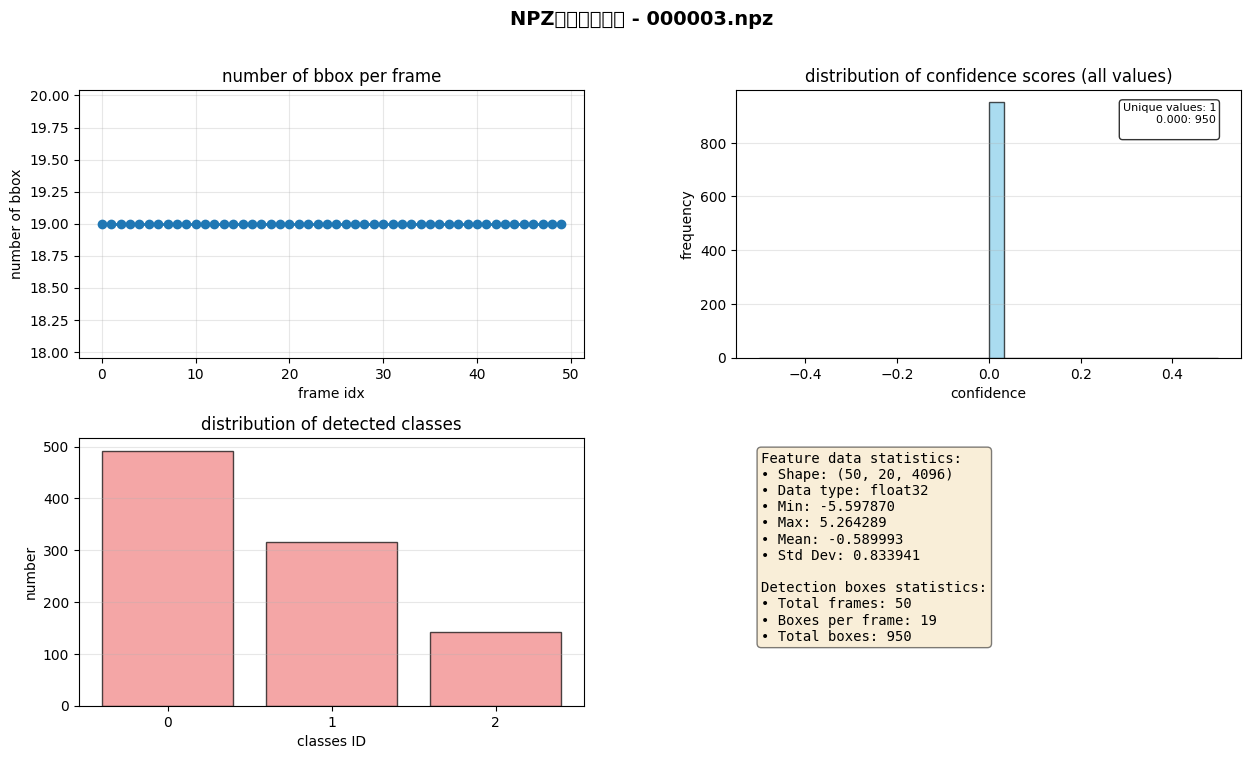


✓ 可视化完成


In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
import numpy as np

# ==================== 配置选项 ====================
SHOW_ALL_FRAMES = True  # 设置为True显示所有帧，False只显示部分帧
# NUM_FRAMES_TO_SHOW = 5  # 如果不显示所有帧，显示前后各多少帧
SAVE_TO_FILE = True  # 是否将详细输出保存到文件

# ==================== 1. 完整的NPZ文件解构 ====================
npz_path = r"F:\data\CarCrash\vgg16_features\positive\000003.npz"
npz_data = np.load(npz_path, allow_pickle=True)

print("=" * 60)
print("NPZ 文件完整信息")
print("=" * 60)
print(f"\n文件路径: {npz_path}")
print(f"所有键: {list(npz_data.keys())}")

# 解构所有内容
for key in npz_data.keys():
    data = npz_data[key]
    print(f"\n【{key}】")
    print(f"  类型: {type(data)}")
    print(f"  数据类型: {data.dtype}")
    print(f"  形状: {data.shape}")
    if data.size <= 100:
        print(f"  内容: \n{data}")
    else:
        print(f"  总元素数: {data.size}")
        print(f"  样本 (前5个元素): {data.flatten()[:5]}")

# ==================== 2. 可视化检测结果 ====================
print("\n" + "=" * 60)
print("检测框可视化")
print("=" * 60)

det_data = npz_data['det']  # Shape: (frames, boxes, 6)
num_frames = det_data.shape[0]

print(f"检测数据形状: {det_data.shape}")
print(f"总帧数: {num_frames}")

# 准备文件输出
output_lines = []
if SAVE_TO_FILE:
    output_lines.append("=" * 80)
    output_lines.append(f"NPZ文件检测框详细信息: {os.path.basename(npz_path)}")
    output_lines.append("=" * 80)
    output_lines.append(f"文件路径: {npz_path}")
    output_lines.append(f"检测数据形状: {det_data.shape}")
    output_lines.append(f"总帧数: {num_frames}\n")

# 确定要显示的帧
if SHOW_ALL_FRAMES:
    frames_to_show = range(num_frames)
    print(f"\n将显示所有 {num_frames} 帧的详细信息")
# else:
#     frames_to_show = list(range(min(NUM_FRAMES_TO_SHOW, num_frames)))
#     if num_frames > 2 * NUM_FRAMES_TO_SHOW:
#         frames_to_show.extend(range(num_frames - NUM_FRAMES_TO_SHOW, num_frames))
#     print(f"\n将显示前 {NUM_FRAMES_TO_SHOW} 帧和后 {NUM_FRAMES_TO_SHOW} 帧的详细信息")

# 分析每一帧的检测数量并显示所有框的详细信息
for frame_idx in range(num_frames):
    frame_boxes = det_data[frame_idx]
    num_boxes = frame_boxes.shape[0]
    
    # 构建输出文本
    frame_output = []
    frame_output.append(f"\n{'='*80}")
    frame_output.append(f"帧 {frame_idx}: {num_boxes} 个检测框")
    frame_output.append(f"{'='*80}")
    frame_output.append(f"{'框序号':<8} {'x1':<10} {'y1':<10} {'x2':<10} {'y2':<10} {'Conf':<12} {'Class':<8} {'面积':<12}")
    frame_output.append("-" * 80)
    
    for box_idx, box in enumerate(frame_boxes):
        x1, y1, x2, y2, conf, cls = box
        area = (x2 - x1) * (y2 - y1)
        frame_output.append(f"{box_idx:<8} {x1:<10.2f} {y1:<10.2f} {x2:<10.2f} {y2:<10.2f} {conf:<12.6f} {int(cls):<8} {area:<12.2f}")
    
    # 显示置信度统计
    confidences = frame_boxes[:, 4]
    if len(confidences) > 0:
        frame_output.append(f"\n置信度统计:")
        frame_output.append(f"  范围: {confidences.min():.6f} ~ {confidences.max():.6f}")
        frame_output.append(f"  平均值: {confidences.mean():.6f}")
        frame_output.append(f"  中位数: {np.median(confidences):.6f}")
        
        # 统计唯一值
        unique_confs, conf_counts = np.unique(confidences, return_counts=True)
        frame_output.append(f"\n置信度值分布:")
        for val, count in zip(unique_confs, conf_counts):
            frame_output.append(f"  {val:.6f}: {count} 个框 ({count/len(confidences)*100:.1f}%)")
    
    # 保存到文件输出
    if SAVE_TO_FILE:
        output_lines.extend(frame_output)
    
    # 根据配置决定是否打印
    if frame_idx in frames_to_show:
        for line in frame_output:
            print(line)
    # elif not SHOW_ALL_FRAMES and frame_idx == NUM_FRAMES_TO_SHOW:
    #     print(f"\n... 省略中间 {num_frames - 2*NUM_FRAMES_TO_SHOW} 帧 ...\n")

# 保存到文件
if SAVE_TO_FILE:
    output_file = npz_path.replace('.npz', '_detection_details.txt')
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write('\n'.join(output_lines))
    print(f"\n✓ 详细信息已保存到文件: {output_file}")
    print(f"  文件大小: {os.path.getsize(output_file) / 1024:.2f} KB")

# 全局统计
print(f"\n{'='*80}")
print("全局检测框统计")
print(f"{'='*80}")
all_confidences = det_data[:, :, 4].flatten()
all_classes = det_data[:, :, 5].flatten()

print(f"总检测框数: {len(all_confidences)}")
print(f"\n置信度统计:")
print(f"  最小值: {all_confidences.min():.6f}")
print(f"  最大值: {all_confidences.max():.6f}")
print(f"  平均值: {all_confidences.mean():.6f}")
print(f"  中位数: {np.median(all_confidences):.6f}")
print(f"  标准差: {all_confidences.std():.6f}")

unique_confs, conf_counts = np.unique(all_confidences, return_counts=True)
print(f"\n全局置信度值分布:")
for val, count in zip(unique_confs, conf_counts):
    print(f"  {val:.6f}: {count} 个框 ({count/len(all_confidences)*100:.1f}%)")

print(f"\n类别分布:")
unique_classes, class_counts = np.unique(all_classes, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"  类别 {int(cls)}: {count} 个框 ({count/len(all_classes)*100:.1f}%)")

# ==================== 3. 绘制检测框分布图 ====================
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

# 3.1 每帧的检测框数量
ax1 = fig.add_subplot(gs[0, 0])
frame_indices = np.arange(num_frames)
boxes_per_frame = np.array([det_data[i].shape[0] for i in range(num_frames)])
ax1.plot(frame_indices, boxes_per_frame, marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('frame idx')
ax1.set_ylabel('number of bbox')
ax1.set_title('number of bbox per frame')
ax1.grid(True, alpha=0.3)

# 3.2 置信度分布直方图（保留所有值包括0）
ax2 = fig.add_subplot(gs[0, 1])
if len(all_confidences) > 0:
    ax2.hist(all_confidences, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax2.set_xlabel('confidence')
    ax2.set_ylabel('frequency')
    ax2.set_title('distribution of confidence scores (all values)')
    ax2.grid(True, alpha=0.3, axis='y')
    # 添加统计信息
    stats_text = f"Unique values: {len(unique_confs)}\n"
    for val, count in zip(unique_confs, conf_counts):
        stats_text += f"{val:.3f}: {count}\n"
    ax2.text(0.95, 0.95, stats_text, transform=ax2.transAxes, 
             fontsize=8, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3.3 类别分布
ax3 = fig.add_subplot(gs[1, 0])
if len(all_classes) > 0:
    ax3.bar(unique_classes, class_counts, color='lightcoral', edgecolor='black', alpha=0.7)
    ax3.set_xlabel('classes ID')
    ax3.set_ylabel('number')
    ax3.set_title('distribution of detected classes')
    ax3.set_xticks(unique_classes)
    ax3.grid(True, alpha=0.3, axis='y')

# 3.4 Feature data information
ax4 = fig.add_subplot(gs[1, 1])
feature_data = npz_data['data']
ax4.text(0.05, 0.95, f"Feature data statistics:\n"
                     f"• Shape: {feature_data.shape}\n"
                     f"• Data type: {feature_data.dtype}\n"
                     f"• Min: {feature_data.min():.6f}\n"
                     f"• Max: {feature_data.max():.6f}\n"
                     f"• Mean: {feature_data.mean():.6f}\n"
                     f"• Std Dev: {feature_data.std():.6f}\n\n"
                     f"Detection boxes statistics:\n"
                     f"• Total frames: {det_data.shape[0]}\n"
                     f"• Boxes per frame: {det_data.shape[1]}\n"
                     f"• Total boxes: {det_data.shape[0] * det_data.shape[1]}",
         transform=ax4.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         family='monospace')
ax4.axis('off')

plt.suptitle(f'NPZ文件完整分析 - {os.path.basename(npz_path)}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✓ 可视化完成")

正在扫描文件夹: F:\data\CarCrash\vgg16_features\positive

已处理: 1500/1500 个文件
总检测框数: 1425000
  - 置信度=0的框数: 1425000
  - 置信度>0的框数: 0

全局 Confidence 统计
最小值: 0.000000
最大值: 0.000000
平均值: 0.000000
中位数: 0.000000
标准差: 0.000000
25分位数: 0.000000
75分位数: 0.000000

唯一值数量: 1

前20个最常见的confidence值:
  0.000000:  1425000 次 (100.00%)

按文件统计信息（前20个文件）
  filename  num_detections  num_zeros  num_nonzeros min_conf max_conf mean_conf std_conf median_conf
000001.npz             950        950             0 0.000000 0.000000  0.000000 0.000000    0.000000
000002.npz             950        950             0 0.000000 0.000000  0.000000 0.000000    0.000000
000003.npz             950        950             0 0.000000 0.000000  0.000000 0.000000    0.000000
000004.npz             950        950             0 0.000000 0.000000  0.000000 0.000000    0.000000
000005.npz             950        950             0 0.000000 0.000000  0.000000 0.000000    0.000000
000006.npz             950        950             0 0.000000 0.000000

C:\Users\29818\AppData\Local\Temp\ipykernel_12864\2825601915.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(box_data, labels=['全部文件'], patch_artist=True)
C:\Users\29818\AppData\Local\Temp\ipykernel_12864\2825601915.py:219: RuntimeWarning: Mean of empty slice.
  • 均值: {nonzero_confidences.mean():.6f}
d:\mini\envs\smart_transport\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\mini\envs\smart_transport\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\29818\AppData\Local\Temp\ipykernel_12864\2825601915.py:228: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
d:\mini

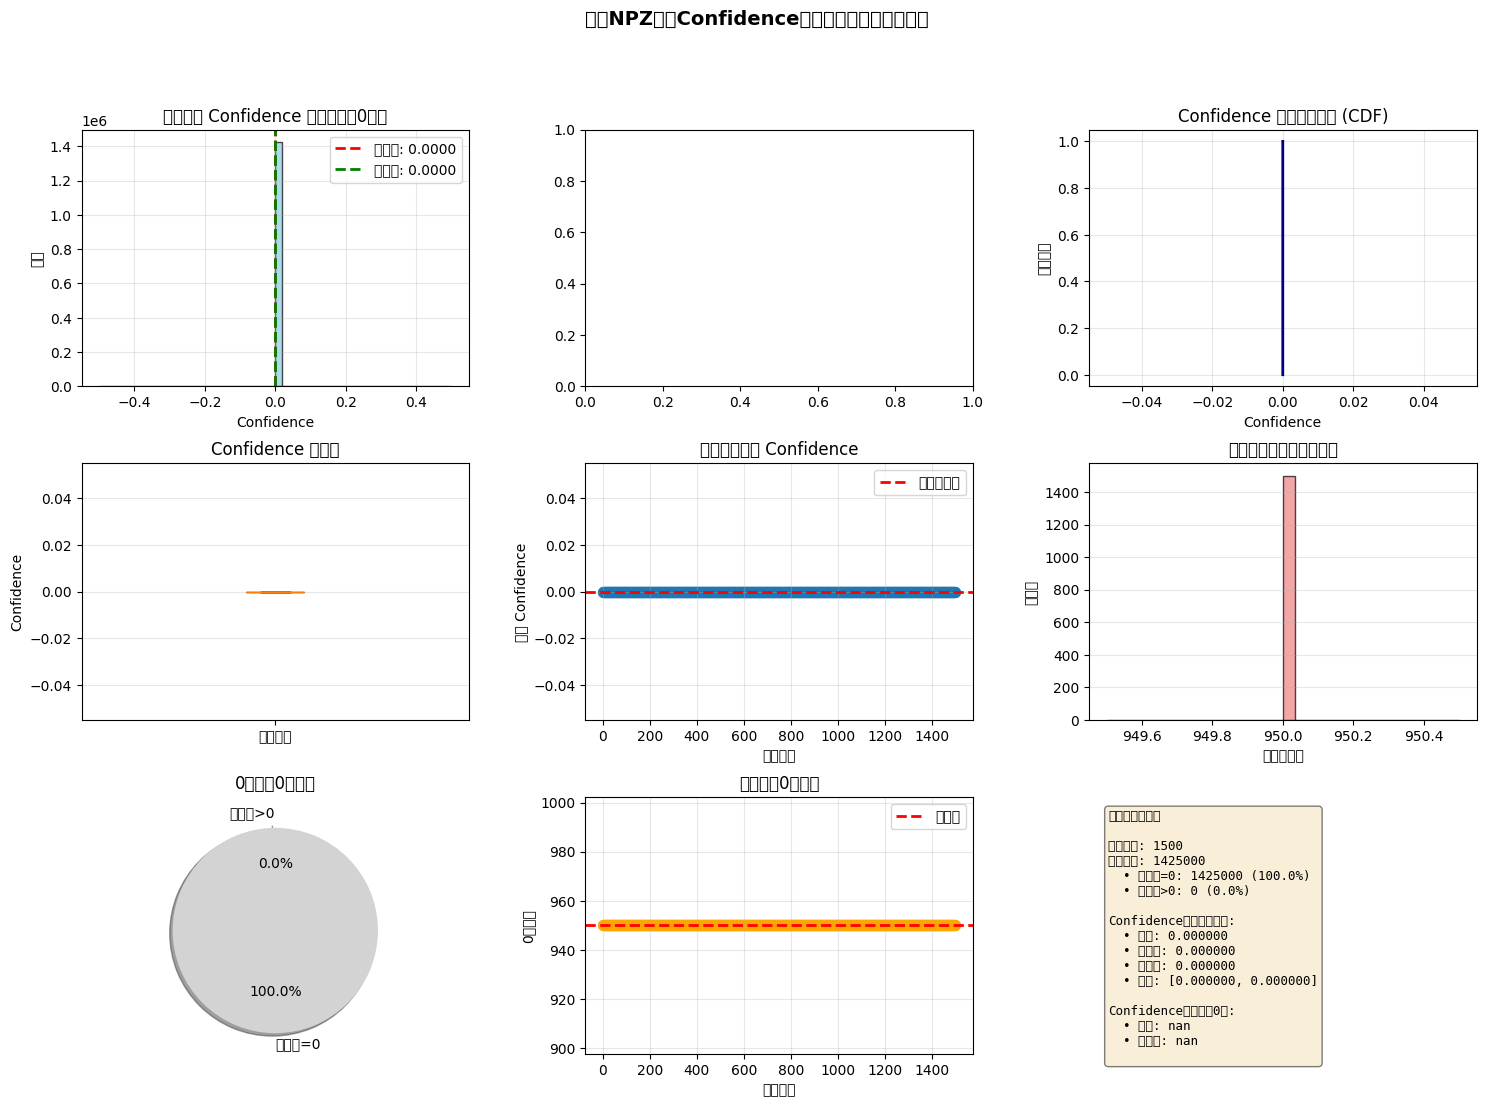


✓ 分析完成


In [9]:
# ==================== 全部NPZ文件的Confidence分布统计 ====================
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
from pathlib import Path

folder_path = r"F:\data\CarCrash\vgg16_features\positive"

# 收集所有confidence值和统计信息
all_confidences = []
file_statistics = []
total_files = 0
processed_files = 0
error_files = 0

print("=" * 70)
print(f"正在扫描文件夹: {folder_path}")
print("=" * 70)

# 遍历文件夹
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.npz'):
        total_files += 1
        file_path = os.path.join(folder_path, filename)
        
        try:
            # 加载NPZ文件
            npz_file = np.load(file_path, allow_pickle=True)
            det = npz_file['det']  # shape: (frames, boxes, 6)
            
            # 提取confidence值（保留所有值，包括0）
            confidences = det[:, :, 4].flatten()
            
            # 收集统计信息
            if len(confidences) > 0:
                file_stats = {
                    'filename': filename,
                    'num_detections': len(confidences),
                    'num_zeros': np.sum(confidences == 0),
                    'num_nonzeros': np.sum(confidences > 0),
                    'min_conf': confidences.min(),
                    'max_conf': confidences.max(),
                    'mean_conf': confidences.mean(),
                    'std_conf': confidences.std(),
                    'median_conf': np.median(confidences)
                }
                file_statistics.append(file_stats)
                all_confidences.extend(confidences)
                processed_files += 1
                
            npz_file.close()
            
        except Exception as e:
            error_files += 1
            if error_files <= 5:  # 只显示前5个错误
                print(f"  ✗ 处理文件 {filename} 时出错: {str(e)}")
            continue

# 转换为numpy数组和DataFrame
all_confidences = np.array(all_confidences)
stats_df = pd.DataFrame(file_statistics)

print(f"\n已处理: {processed_files}/{total_files} 个文件")
if error_files > 0:
    print(f"出错文件: {error_files} 个")
print(f"总检测框数: {len(all_confidences)}")
print(f"  - 置信度=0的框数: {np.sum(all_confidences == 0)}")
print(f"  - 置信度>0的框数: {np.sum(all_confidences > 0)}")

# ==================== 全局统计信息 ====================
print("\n" + "=" * 70)
print("全局 Confidence 统计")
print("=" * 70)

if len(all_confidences) > 0:
    print(f"最小值: {all_confidences.min():.6f}")
    print(f"最大值: {all_confidences.max():.6f}")
    print(f"平均值: {all_confidences.mean():.6f}")
    print(f"中位数: {np.median(all_confidences):.6f}")
    print(f"标准差: {all_confidences.std():.6f}")
    print(f"25分位数: {np.percentile(all_confidences, 25):.6f}")
    print(f"75分位数: {np.percentile(all_confidences, 75):.6f}")
    
    # 统计各个值的出现次数
    unique_vals, counts = np.unique(all_confidences, return_counts=True)
    print(f"\n唯一值数量: {len(unique_vals)}")
    print(f"\n前20个最常见的confidence值:")
    sorted_indices = np.argsort(counts)[::-1][:20]
    for idx in sorted_indices:
        val, count = unique_vals[idx], counts[idx]
        percentage = count / len(all_confidences) * 100
        print(f"  {val:.6f}: {count:8d} 次 ({percentage:6.2f}%)")
else:
    print("警告: 未找到有效的confidence数据！")

# ==================== 按文件统计 ====================
if len(stats_df) > 0:
    print("\n" + "=" * 70)
    print("按文件统计信息（前20个文件）")
    print("=" * 70)
    display_df = stats_df.head(20).copy()
    for col in ['min_conf', 'max_conf', 'mean_conf', 'std_conf', 'median_conf']:
        display_df[col] = display_df[col].apply(lambda x: f"{x:.6f}")
    print(display_df.to_string(index=False))

    if len(stats_df) > 20:
        print(f"\n... 还有 {len(stats_df) - 20} 个文件")

    # ==================== 可视化 ====================
    fig = plt.figure(figsize=(18, 12))
    gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

    # 1. 全局confidence分布直方图（包含所有值）
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.hist(all_confidences, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.axvline(all_confidences.mean(), color='red', linestyle='--', linewidth=2, label=f'平均值: {all_confidences.mean():.4f}')
    ax1.axvline(np.median(all_confidences), color='green', linestyle='--', linewidth=2, label=f'中位数: {np.median(all_confidences):.4f}')
    ax1.set_xlabel('Confidence')
    ax1.set_ylabel('频数')
    ax1.set_title('全部文件 Confidence 分布（包含0值）')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. 不包含0值的confidence分布
    ax2 = fig.add_subplot(gs[0, 1])
    nonzero_confidences = all_confidences[all_confidences > 0]
    if len(nonzero_confidences) > 0:
        ax2.hist(nonzero_confidences, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
        ax2.axvline(nonzero_confidences.mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'平均值: {nonzero_confidences.mean():.4f}')
        ax2.set_xlabel('Confidence')
        ax2.set_ylabel('频数')
        ax2.set_title('Confidence 分布（仅非0值）')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

    # 3. 累积分布函数
    ax3 = fig.add_subplot(gs[0, 2])
    sorted_conf = np.sort(all_confidences)
    y = np.arange(1, len(sorted_conf) + 1) / len(sorted_conf)
    ax3.plot(sorted_conf, y, linewidth=2, color='navy')
    ax3.set_xlabel('Confidence')
    ax3.set_ylabel('累积概率')
    ax3.set_title('Confidence 累积分布函数 (CDF)')
    ax3.grid(True, alpha=0.3)

    # 4. 箱线图
    ax4 = fig.add_subplot(gs[1, 0])
    box_data = [all_confidences]
    bp = ax4.boxplot(box_data, labels=['全部文件'], patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
    ax4.set_ylabel('Confidence')
    ax4.set_title('Confidence 箱线图')
    ax4.grid(True, alpha=0.3, axis='y')

    # 5. 各文件的平均confidence分布
    ax5 = fig.add_subplot(gs[1, 1])
    mean_confs = stats_df['mean_conf'].values
    file_indices = np.arange(len(mean_confs))
    ax5.scatter(file_indices, mean_confs, alpha=0.6, s=50)
    ax5.axhline(all_confidences.mean(), color='red', linestyle='--', linewidth=2, label='全局平均值')
    ax5.set_xlabel('文件索引')
    ax5.set_ylabel('平均 Confidence')
    ax5.set_title('各文件的平均 Confidence')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # 6. 各文件的检测框数量分布
    ax6 = fig.add_subplot(gs[1, 2])
    num_dets = stats_df['num_detections'].values
    ax6.hist(num_dets, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    ax6.set_xlabel('检测框数量')
    ax6.set_ylabel('文件数')
    ax6.set_title('各文件的检测框数量分布')
    ax6.grid(True, alpha=0.3, axis='y')

    # 7. 0值与非0值比例
    ax7 = fig.add_subplot(gs[2, 0])
    zero_counts = stats_df['num_zeros'].values
    nonzero_counts = stats_df['num_nonzeros'].values
    total_zeros = zero_counts.sum()
    total_nonzeros = nonzero_counts.sum()
    labels = ['置信度=0', '置信度>0']
    sizes = [total_zeros, total_nonzeros]
    colors = ['lightgray', 'lightgreen']
    explode = (0.05, 0)
    ax7.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax7.set_title('0值与非0值比例')

    # 8. 各文件的0值数量分布
    ax8 = fig.add_subplot(gs[2, 1])
    ax8.scatter(file_indices, zero_counts, alpha=0.6, s=50, color='orange')
    ax8.axhline(zero_counts.mean(), color='red', linestyle='--', linewidth=2, label='平均值')
    ax8.set_xlabel('文件索引')
    ax8.set_ylabel('0值数量')
    ax8.set_title('各文件的0值数量')
    ax8.legend()
    ax8.grid(True, alpha=0.3)

    # 9. 统计汇总
    ax9 = fig.add_subplot(gs[2, 2])
    stats_text = f"""全局统计摘要：

总文件数: {processed_files}
总检测框: {len(all_confidences)}
  • 置信度=0: {np.sum(all_confidences == 0)} ({np.sum(all_confidences == 0)/len(all_confidences)*100:.1f}%)
  • 置信度>0: {np.sum(all_confidences > 0)} ({np.sum(all_confidences > 0)/len(all_confidences)*100:.1f}%)

Confidence统计（全部）:
  • 均值: {all_confidences.mean():.6f}
  • 中位数: {np.median(all_confidences):.6f}
  • 标准差: {all_confidences.std():.6f}
  • 范围: [{all_confidences.min():.6f}, {all_confidences.max():.6f}]

Confidence统计（非0）:
  • 均值: {nonzero_confidences.mean():.6f}
  • 中位数: {np.median(nonzero_confidences):.6f}
"""
    ax9.text(0.05, 0.95, stats_text, transform=ax9.transAxes, fontsize=9, 
             verticalalignment='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax9.axis('off')

    plt.suptitle(f'全部NPZ文件Confidence分布分析（包含所有值）', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 70)
print("✓ 分析完成")
print("=" * 70)

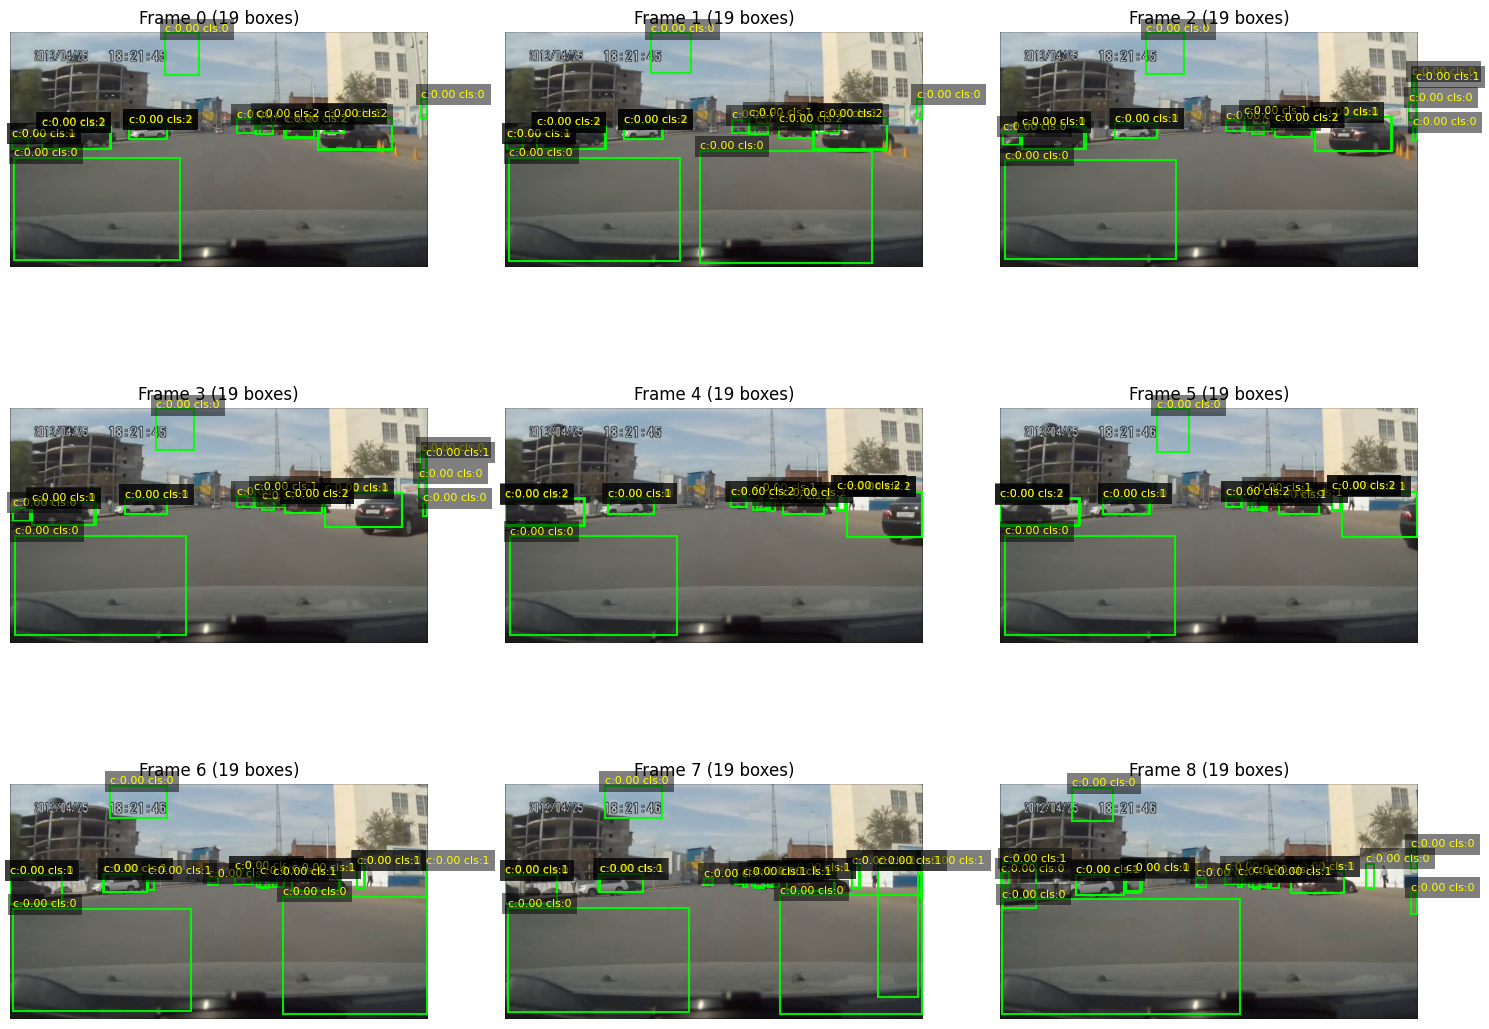

展示帧索引: [0, 1, 2, 3, 4, 5, 6, 7, 8]
每帧锚框数量: 19
视频总帧数: 50
检测帧数: 50


In [11]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

"""
逐帧在原始视频画面上叠加锚框，并展示指定数量的帧。
请根据实际视频路径修改 video_path。
"""
video_path = r"F:\data\CarCrash\videos\Crash-1500\000003.mp4"  # TODO: 替换为真实视频路径
npz_path = r"F:\data\CarCrash\vgg16_features\positive\000003.npz"
max_frames_to_show = 9  # 展示的帧数（前N帧）

if not os.path.exists(video_path):
    print(f"✗ 未找到视频文件: {video_path}")
else:
    cap = cv2.VideoCapture(video_path)
    total_video_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    npz_data = np.load(npz_path, allow_pickle=True)
    det_data = npz_data['det']  # (frames, boxes, 6)
    num_det_frames = det_data.shape[0]
    boxes_per_frame = det_data.shape[1]

    frames_to_show = list(range(min(max_frames_to_show, num_det_frames, total_video_frames)))

    cols = 3
    rows = int(np.ceil(len(frames_to_show) / cols)) or 1
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = np.array(axes).reshape(rows, cols)

    # 先关闭所有轴
    for ax in axes.ravel():
        ax.axis('off')

    for ax, frame_idx in zip(axes.ravel(), frames_to_show):
        # 跳转到指定帧
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            ax.set_title(f'Frame {frame_idx} 读取失败')
            continue

        # BGR -> RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        ax.imshow(frame_rgb)
        ax.set_title(f'Frame {frame_idx} ({boxes_per_frame} boxes)')
        ax.axis('off')

        frame_boxes = det_data[frame_idx]
        for box in frame_boxes:
            x1, y1, x2, y2, conf, cls = box
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                     linewidth=1.5, edgecolor='lime', facecolor='none', alpha=0.9)
            ax.add_patch(rect)
            ax.text(x1, max(y1 - 5, 0), f'c:{conf:.2f} cls:{int(cls)}',
                    fontsize=8, color='yellow',
                    bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

    plt.tight_layout()
    plt.show()

    cap.release()

    print(f"展示帧索引: {frames_to_show}")
    print(f"每帧锚框数量: {boxes_per_frame}")
    print(f"视频总帧数: {total_video_frames}")
    print(f"检测帧数: {num_det_frames}")
